In [1]:
import os, sys

os.chdir("../../")
sys.path.append("./src")
sys.path.append("./../src/probability")
sys.path.append("./../src/data")
sys.path.append("./../src/events")
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from IC.processer import *
from IC.importer import *
from IC.main import integrate
from plotter import savethesis

res = get_IC_data()
Ereco = 500 * 10 ** (np.linspace(0.0, 1.3, 14))
model = train_energy_resolution(False)
ztrue = np.linspace(-1, 0, 100)
interp_flux = interpolate_flux(False)
aeff_list = interpolate_aeff(False)

In [2]:
flux_df = get_flux_df()
flux_df = flux_df.query("GeV > 5.6").query("GeV < 10000")

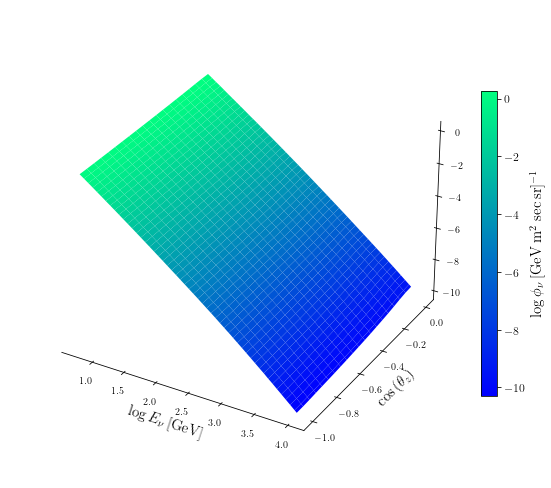

In [76]:
import matplotlib

matplotlib.rc("text.latex", preamble=r"\usepackage{siunitx}")
flavor = "m"
# Etrue,_,_ = get_Etrue(E_index=0,npoints=25, left_alpha=0.99, right_alpha=0.99, model=model)
Etrue = np.logspace(np.log10(5.6), 4, 100)
ztrue = np.linspace(-1, 0, 20)
X, Y = np.meshgrid(Etrue, ztrue)
flux = get_flux(flavor, X, Y, interp_flux)


fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111, projection="3d")
im = ax.plot_surface(np.log10(X), Y, np.log10(flux), cmap="winter")

# ax.scatter(np.log10(flux_df.GeV),(flux_df.z_min + flux_df.z_max)/2, np.log10(flux_df.m_flux),c='r',s=4)
# ax.set_title(r'Interpolated average South Pole atmospheric $\nu_\mu$ flux')
ax.set_xlabel(r"$\log{}E_\nu \,[\si{\GeV}]$", fontsize=15)
ax.set_ylabel(r"$\cos{(\theta_z)}$", fontsize=15)
# ax.set_zlabel(r'$\log{}\phi_\nu \, [\si{\GeV\,\m\squared\, \sec \steradian}]^{-1}$', fontsize=15)

# Remove gray panes and axis grid
ax.xaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor("white")
ax.yaxis.pane.fill = False
ax.yaxis.pane.set_edgecolor("white")
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor("white")
ax.grid(False)
# Remove z-axis
ax.w_zaxis.line.set_lw(0.0)
ax.set_zticks([])
# Adjust plot view
# ax.view_init(elev=50, azim=225)
ax.dist = 11
# Add colorbar
cbar = fig.colorbar(im, ax=ax, shrink=0.4, pad=0, aspect=20)
cbar.set_label(
    r"$\log{}\phi_\nu \, [\si{\GeV\,\m\squared\, \sec \steradian}]^{-1}$", fontsize=15
)
cbar.ax.tick_params(labelsize=12)
# savethesis(fig, 'flux')

In [24]:
import matplotlib

matplotlib.rc("text.latex", preamble=r"\usepackage{siunitx}")
flavor = "m"
# Etrue,_,_ = get_Etrue(E_index=0,npoints=25, left_alpha=0.99, right_alpha=0.99, model=model)
Etrue = np.logspace(np.log10(5.6), 4, 100)
ztrue = [-1, -0.8, 0.1]
X = [np.meshgrid(Etrue, z)[0] for z in ztrue]
Y = [np.meshgrid(Etrue, z)[1] for z in ztrue]
flux = [get_flux(flavor, X, Y, interp_flux).reshape(3, 100, 1) for x, y in zip(X, Y)]

In [25]:
flux[1].shape

(3, 100, 1)

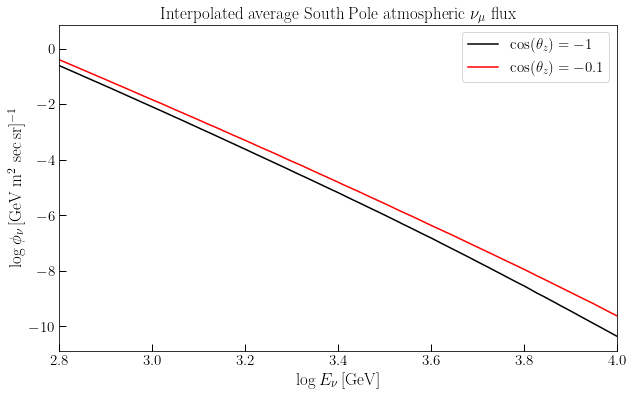

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(np.log10(Etrue), np.log10(flux)[0][0], c="k", label=r"$\cos(\theta_z) = -1$")
ax.plot(np.log10(Etrue), np.log10(flux)[2][2], c="r", label=r"$\cos(\theta_z) = -0.1$")
ax.set_title(r"Interpolated average South Pole atmospheric $\nu_\mu$ flux", fontsize=17)
ax.set_xlabel(r"$\log{}E_\nu \,[\si{\GeV}]$", fontsize=17)
ax.set_ylabel(
    r"$\log{}\phi_\nu \, [\si{\GeV\,\m\squared\, \sec \steradian}]^{-1}$", fontsize=17
)
ax.tick_params(
    axis="both",
    direction="in",
    which="both",
    labelsize=15,
    width=1,
    length=7,
    zorder=20,
)
ax.set_xlim((2.8, 4))
ax.grid(False)
ax.legend(fontsize=15)
savethesis(fig, "flux")

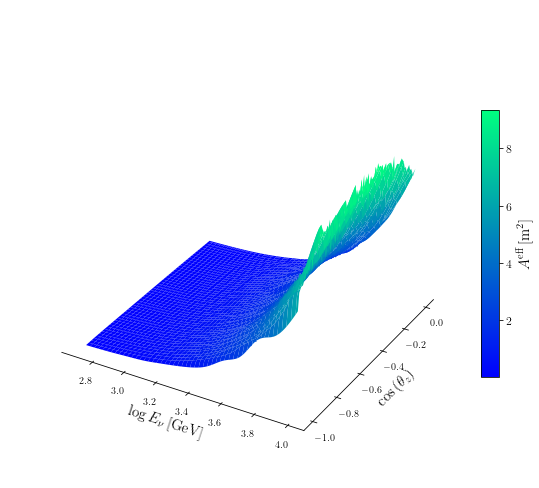

In [70]:
Etrue = np.logspace(np.log10(500), 4, 100)
ztrue = np.linspace(-1, 0, 100)
E_mesh, z_mesh = np.meshgrid(Etrue, ztrue)

aeff_num = aeff_list(E_mesh, z_mesh)
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111, projection="3d")
plot = ax.plot_surface(np.log10(E_mesh), z_mesh, aeff_num, cmap="winter")
# ax.set_title(r'Interpolated effective area')
ax.set_xlabel(r"$\log{}E_\nu \,[\si{\GeV}]$", fontsize=15)
ax.set_ylabel(r"$\cos{(\theta_z)}$", fontsize=15)
# ax.set_zlabel(r'$A^\text{eff}\, [\si{\metre\squared}]$', fontsize=15)
# Remove gray panes and axis grid
ax.xaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor("white")
ax.yaxis.pane.fill = False
ax.yaxis.pane.set_edgecolor("white")
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor("white")
ax.grid(False)
# Remove z-axis
ax.w_zaxis.line.set_lw(0.0)
ax.set_zticks([])
# Adjust plot view
# ax.view_init(elev=50, azim=225)
ax.dist = 11
# Add colorbar
cbar = fig.colorbar(plot, ax=ax, shrink=0.35, pad=0, aspect=15)
cbar.set_label(r"$A^\text{eff}\, [\si{\metre\squared}]$", fontsize=15)
cbar.ax.tick_params(labelsize=12)
savethesis(fig, "aeff")

In [52]:
aeff[0]

array([[0.042, 0.045, 0.048, 0.051, 0.055, 0.059, 0.062, 0.066, 0.071,
        0.075, 0.08 , 0.085, 0.09 , 0.097, 0.103, 0.11 , 0.117, 0.124,
        0.132, 0.139, 0.146, 0.152, 0.159, 0.166, 0.173, 0.181, 0.19 ,
        0.2  , 0.212, 0.226, 0.241, 0.258, 0.276, 0.295, 0.314, 0.334,
        0.353, 0.373, 0.392, 0.412, 0.431, 0.452, 0.472, 0.494, 0.516,
        0.539, 0.563, 0.588, 0.614, 0.642, 0.672, 0.703, 0.737, 0.774,
        0.815, 0.861, 0.912, 0.97 , 1.036, 1.109, 1.189, 1.274, 1.361,
        1.447, 1.531, 1.607, 1.673, 1.731, 1.783, 1.834, 1.887, 1.948,
        2.025, 2.123, 2.246, 2.391, 2.553, 2.726, 2.903, 3.075, 3.232,
        3.363, 3.467, 3.548, 3.611, 3.66 , 3.703, 3.749, 3.807, 3.886,
        3.986, 4.106, 4.246, 4.404, 4.577, 4.764, 4.96 , 5.165, 5.377,
        5.596]])

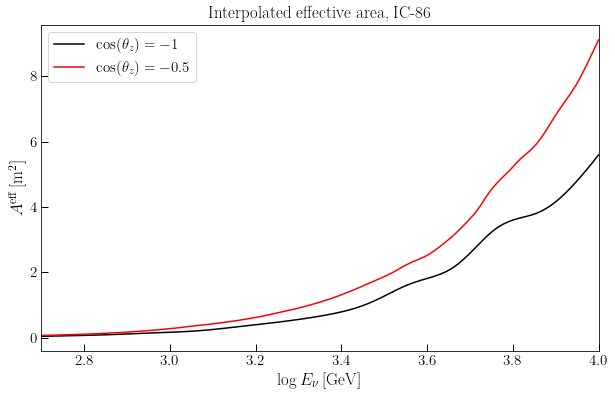

In [82]:
Etrue = np.logspace(np.log10(500), 4, 100)
ztrue = [-1, -0.5, 0.1]
X = [np.meshgrid(Etrue, z)[0] for z in ztrue]
Y = [np.meshgrid(Etrue, z)[1] for z in ztrue]
E_mesh, z_mesh = np.meshgrid(Etrue, ztrue)

aeff = [aeff_list(x, y) for x, y in zip(X, Y)]

fig, ax = plt.subplots(1, figsize=(10, 6))
plot = ax.plot(
    np.log10(X)[0].reshape(100), aeff[0][0], label=r"$\cos(\theta_z) = -1$", c="k"
)
ax.plot(
    np.log10(X)[0].reshape(100), aeff[1][0], label=r"$\cos(\theta_z) = -0.5$", c="r"
)
ax.set_title(r"Interpolated effective area, IC-86", fontsize=17)
ax.set_xlabel(r"$\log{}E_\nu \,[\si{\GeV}]$", fontsize=17)
ax.set_ylabel(r"$A^\text{eff}\, [\si{\metre\squared}]$", fontsize=17)
ax.set_xlim(np.log10(Etrue).min(), np.log10(Etrue).max())
ax.tick_params(
    axis="both",
    direction="in",
    which="both",
    labelsize=15,
    width=1,
    length=7,
    zorder=20,
)

ax.legend(fontsize=15)
savethesis(fig, "aeff")